# Deep Learning - Project 2

## We'll use the Fashion-MNIST dataset to build a CNN neural network

## Part 1 Data Preparation

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# display all rows and columns of data without truncation
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [ ]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,...,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,...,0,0,0,0,0
1,9,0,0,0,0,...,0,0,0,0,0
2,6,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,1,...,1,0,0,0,0
4,3,0,0,0,0,...,0,0,0,0,0


In [ ]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


## Describe the training set

In [ ]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,...,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,...,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,...,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,...,255.000000,255.000000,255.000000,255.000000,170.00000


## Clean the data

In [ ]:
train.isnull().sum().sort_values(ascending=False).sum()

0

There are no null values

## Check for duplicates

In [ ]:
# print the same of duplicates
train.duplicated().sum()

43

In [ ]:
# drop duplicates
train.drop_duplicates(subset=None, keep="first", inplace=True)

In [ ]:
# print the same of duplicates
train.duplicated().sum()

0

## Data Visualization

In [ ]:
train['label'].value_counts()

5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: label, dtype: int64

<Axes: >

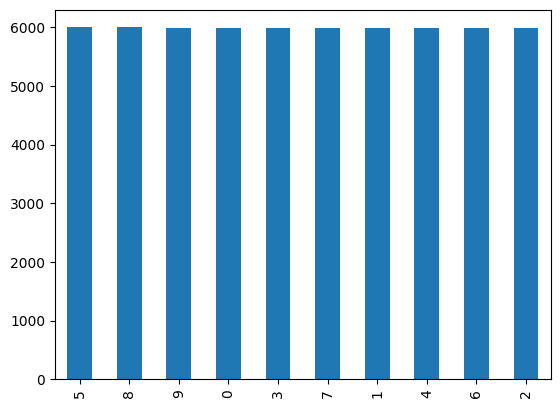

In [ ]:
train['label'].value_counts().plot.bar()

The data is balanced, since the above figure shows that all labels are at the same frequency level.

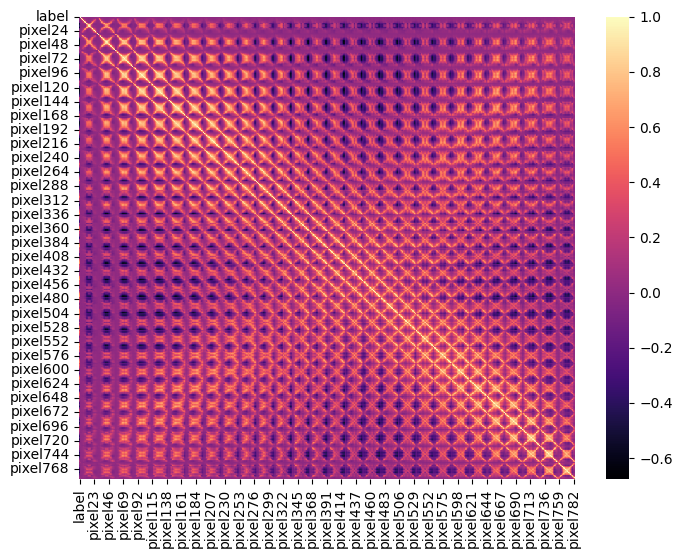

In [ ]:
plt.figure(figsize=(8, 6))

# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="magma")
  
# displaying heatmap
plt.show()

In [ ]:
# train.corr().style.background_gradient(cmap="YlGnBu")

<Axes: xlabel='pixel1', ylabel='Count'>

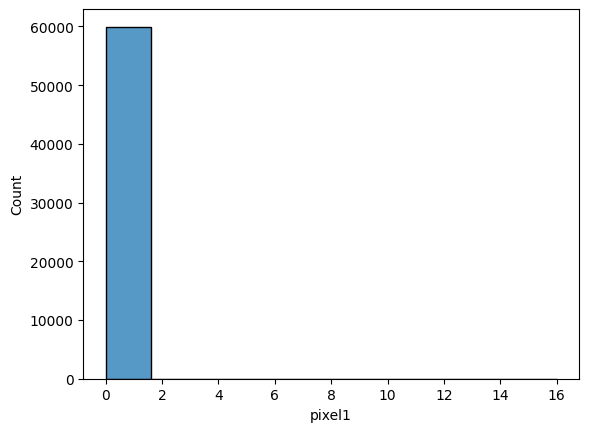

In [ ]:
sns.histplot(train['pixel1'], bins=10, kde=False)

<Axes: xlabel='pixel20', ylabel='Count'>

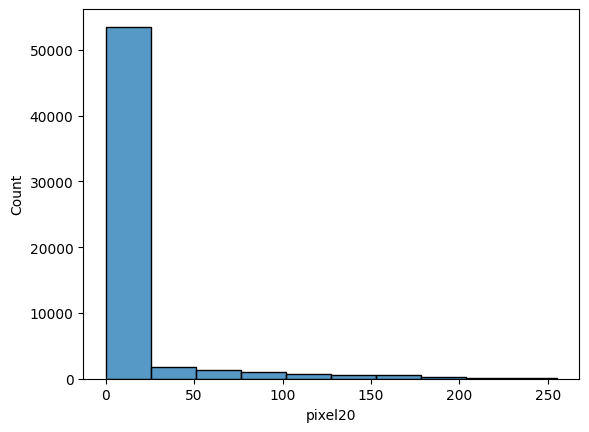

In [ ]:
sns.histplot(train['pixel20'], bins=10, kde=False)

In [ ]:
train = np.asarray(train,dtype=np.float32)
test = np.asarray(test,dtype=np.float32)
# normalize the data
x_train = train[:,1:]/255  
y_train = train[:,0]
x_test = test[:,1:]/255
y_test = test[:,0]

In [ ]:
# split the train dataset into train and validation sets
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,stratify=y_train, random_state=42)

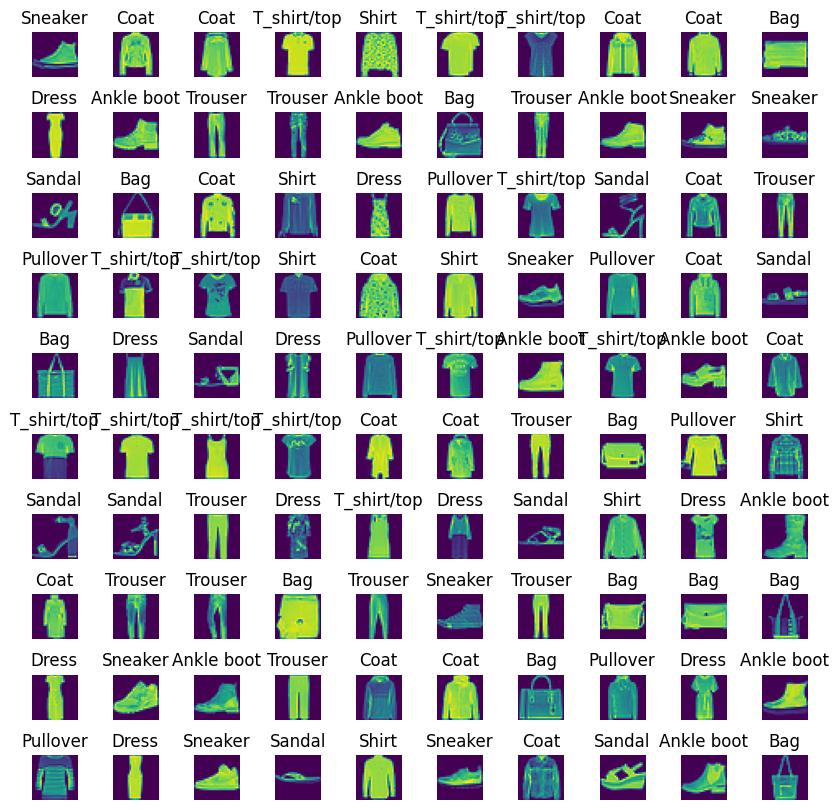

In [ ]:
# Image visualization
# assign the labels to its corresponding values from the data set
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.subplots_adjust(hspace=.7,wspace=0.8)
plt.show()

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

array([7., 4., 4., ..., 2., 2., 4.], dtype=float32)

## Encode the labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(y_val.reshape(-1, 1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_labels_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
val_labels_one_hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Part 2

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.layers import Dense,Dropout,Flatten , Activation , Input
from tensorflow.keras.applications import EfficientNetB1 , MobileNetV2 , VGG16 , ResNet152V2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler , ModelCheckpoint
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D , GlobalMaxPooling2D

In [ ]:
# reshape the train and validation data to be # of rows x 28 x 28
x_train1 = x_train.reshape(-1,28,28)
x_val1 = x_val.reshape(-1,28,28)
x_train1.shape, x_val1.shape

((47965, 28, 28), (11992, 28, 28))

In [ ]:
# perform padding and normalization on the train and validation datasets so their shape is # of rows x 32 x 32
x_train1 = tf.pad(x_train1, [[0, 0], [2,2], [2,2]])/255
x_val1 = tf.pad(x_val1, [[0, 0], [2,2], [2,2]])/255
x_train1.shape, x_val1.shape

(TensorShape([47965, 32, 32]), TensorShape([11992, 32, 32]))

In [ ]:
# expand dimension so the train and validation datasets have an additional dimension
x_train1 = tf.expand_dims(x_train1, axis=3, name=None)
x_val1 = tf.expand_dims(x_val1, axis=3, name=None)
x_train1.shape

TensorShape([47965, 32, 32, 1])

In [ ]:
x_train1.shape[1:]

TensorShape([32, 32, 1])

## LeNet-5 Model

The input layer consists of (32 x 32 x 1) dimension images. As the images are 28 x 28, they are padded with 0s to make them 32 x 32.
Convolution Layer 1 : Consists of 6 filters of size 5 x 5. Gives an output of shape (28 x 28 x 6).
** Pooling Layer 1 ** : Max pooling which reduces the input size in half. Output: (14 x 14 x 6).
** Convolution Layer 2 ** : Consists of 16 filters of size 5 x 5. Gives an output of shape (10 x 10 x 16).
** Pooling Layer 2 : Max pooling which reduces the input size in half. Output: **(5 x 5 x 16)..
The output is then flattened and passed on to a fully connected layer of 120 neurons and then 84 neurons.
The final output is a softmax output with 10 classes.

### Build the LeNet-5 Model

In [ ]:
# adjust the input shape to be 32 x 32 x 1 so it's suitable for the lenet-5 architecture
input_shape = x_train1.shape[1:]

# create_model function takes the input shape as an input parameter and builds the lenet-5 model
def create_model(input_shape):
    lenet_5_model = Sequential()
    lenet_5_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
    lenet_5_model.add(MaxPooling2D(strides=2))
    lenet_5_model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    lenet_5_model.add(MaxPooling2D(strides=2))
    lenet_5_model.add(Flatten())
    lenet_5_model.add(Dense(256, activation='relu'))
    lenet_5_model.add(Dense(84, activation='relu'))
    lenet_5_model.add(Dense(10, activation='softmax'))
    lenet_5_model.build()
    lenet_5_model.compile(optimizer=Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])

    return lenet_5_model

In [ ]:
model = create_model(x_train1.shape[1:])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1728)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
history = model.fit(x_train1, train_labels_one_hot, batch_size=64, epochs=30, validation_data=(x_val1, val_labels_one_hot))

Epoch 1/30
750/750 [==============================] - 16s 8ms/step - loss: 0.9618 - accuracy: 0.6348 - val_loss: 0.6797 - val_accuracy: 0.7419
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.6574 - accuracy: 0.7485 - val_loss: 0.6019 - val_accuracy: 0.7655
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.5770 - accuracy: 0.7808 - val_loss: 0.5260 - val_accuracy: 0.8071
Epoch 4/30
750/750 [==============================] - 5s 6ms/step - loss: 0.5016 - accuracy: 0.8159 - val_loss: 0.4705 - val_accuracy: 0.8252
Epoch 5/30
750/750 [==============================] - 5s 6ms/step - loss: 0.4495 - accuracy: 0.8345 - val_loss: 0.4412 - val_accuracy: 0.8342
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.4131 - accuracy: 0.8481 - val_loss: 0.4064 - val_accuracy: 0.8514
Epoch 7/30
750/750 [==============================] - 9s 12ms/step - loss: 0.3885 - accuracy: 0.8576 - val_loss: 0.3904 - val_accuracy: 0.8588
Epoc

### Plot Accuracy and Loss graphs to evaluate model
It reached 0.8981 accuracy on the validation data

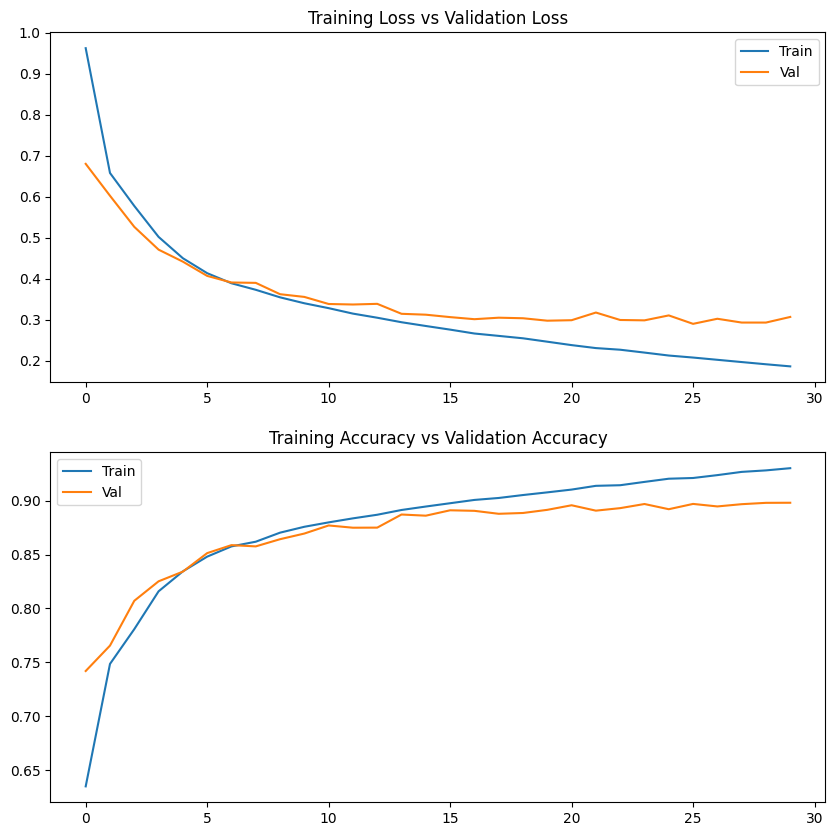

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

# Modify hyperparameters to get to the best performance using Keras Tuner

In [ ]:
input_shape = x_train1.shape[1:]
def model_builder(hp):
    lenet_5_model = Sequential()
    lenet_5_model.add(Conv2D(filters=hp.Int('CONV_1_FILTER',min_value=32, max_value=64),
                     kernel_size=hp.Choice('KERNEL_1_FILTER', values=[3,5]),activation='relu',  padding='same',input_shape=(32,32,1)))
    
    lenet_5_model.add(MaxPooling2D(strides=2))
    lenet_5_model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    lenet_5_model.add(Conv2D(filters=hp.Int('CONV_2_FILTER',min_value=32, max_value=128),
                     kernel_size=hp.Choice('KERNEL_2_FILTER', values=[3,5]), activation='relu',padding='valid'))
    
    
    lenet_5_model.add(MaxPooling2D(strides=2))
    lenet_5_model.add(Flatten())
    lenet_5_model.add(Dense(256, activation='relu'))
    lenet_5_model.add(Dropout(hp.Float('DROPOUT_1', min_value=0.0,max_value=0.5,default=0.25,step=0.05)))

    lenet_5_model.add(Dense(84, activation='relu'))
    lenet_5_model.add(Dense(10, activation='softmax'))
    lenet_5_model.build()
    lenet_5_model.compile(optimizer=Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    lenet_5_model.compile(Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                    loss='categorical_crossentropy', metrics=['accuracy'])

    return lenet_5_model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10, 
                     directory='models',
                     project_name='mnist')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
CONV_1_FILTER (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 1, 'sampling': 'linear'}
KERNEL_1_FILTER (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
CONV_2_FILTER (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 1, 'sampling': 'linear'}
KERNEL_2_FILTER (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
DROPOUT_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [45]:
# perform early stop to prevent the model from overfitting
stop_early = EarlyStopping(monitor='val_loss', patience=5)
tuner.search(x_train1, train_labels_one_hot, epochs=20, 
             validation_data=(x_val1 ,val_labels_one_hot), callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 01m 38s]
val_accuracy: 0.8578218817710876

Best val_accuracy So Far: 0.8834222555160522
Total elapsed time: 00h 24m 04s


In [46]:
fModel = tuner.hypermodel.build(best_hps)

In [47]:
fModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 61)        1586      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 61)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 48)        73248     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 43)        18619     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 43)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1075)             

In [49]:
# Creating a Model Checkpoint to save it
filepath="New\mnist1.hdf5"
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list_conv = [checkpoint_conv]

import time
start_time = time.time()
    
mymodel = fModel.fit( x_train1, train_labels_one_hot, batch_size=64, 
                    steps_per_epoch = int(np.ceil(len(x_train1)/float(64))), # Num of batches
                    epochs = 30, 
                    validation_data =(x_val1, val_labels_one_hot),
                    shuffle = True,
                    callbacks=callbacks_list_conv
                          )
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch 1/30
748/750 [============================>.] - ETA: 0s - loss: 1.0005 - accuracy: 0.6190
Epoch 1: val_accuracy improved from -inf to 0.73474, saving model to New\mnist1.hdf5
750/750 [==============================] - 9s 7ms/step - loss: 0.9998 - accuracy: 0.6192 - val_loss: 0.7021 - val_accuracy: 0.7347
Epoch 2/30
745/750 [============================>.] - ETA: 0s - loss: 0.6628 - accuracy: 0.7478
Epoch 2: val_accuracy improved from 0.73474 to 0.78069, saving model to New\mnist1.hdf5
750/750 [==============================] - 5s 6ms/step - loss: 0.6619 - accuracy: 0.7482 - val_loss: 0.5987 - val_accuracy: 0.7807
Epoch 3/30
742/750 [============================>.] - ETA: 0s - loss: 0.5748 - accuracy: 0.7841
Epoch 3: val_accuracy improved from 0.78069 to 0.80287, saving model to New\mnist1.hdf5
750/750 [==============================] - 6s 8ms/step - loss: 0.5743 - accuracy: 0.7841 - val_loss: 0.5248 - val_accuracy: 0.8029
Epoch 4/30
748/750 [============================>.] - ETA:

### Plot Accuracy and Loss graphs to evaluate our best estimator

The accuracy slightly decreased to 0.8940 on using the validation data 

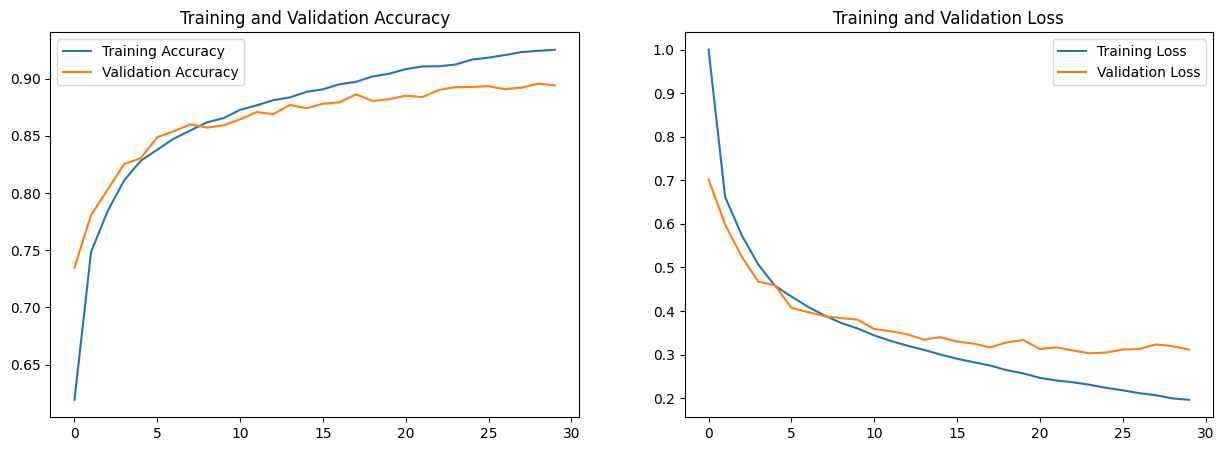

In [52]:
acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']

loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(range(30), acc, label='Training Accuracy')
axs[0].plot(range(30), val_acc, label='Validation Accuracy')
axs[0].legend()
axs[0].title.set_text('Training and Validation Accuracy')

axs[1].plot(range(30), loss, label='Training Loss')
axs[1].plot(range(30), val_loss, label='Validation Loss')
axs[1].legend()
axs[1].title.set_text('Training and Validation Loss')

# Evaluate the model using 10-fold cross-validation.

In [69]:
def plot_graphs(history, type):
    plt.figure(figsize=(15,5))

    if type == "loss":
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('Model Loss')
      plt.ylabel('Losses')
    else: # accuracy
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
      plt.title('Model Accuracy')
      plt.ylabel('Accuracies')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

 ### Perform 10-fold cross validation on our data

Train each fold for 30 epochs and for each fold, draw the accuracy and loss curves.

fold 1 ...
Epoch 1/30
750/750 [==============================] - 7s 6ms/step - loss: 0.0988 - accuracy: 0.9629 - val_loss: 0.0992 - val_accuracy: 0.9623
Epoch 2/30
750/750 [==============================] - 6s 7ms/step - loss: 0.0955 - accuracy: 0.9638 - val_loss: 0.0926 - val_accuracy: 0.9641
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0949 - accuracy: 0.9641 - val_loss: 0.0816 - val_accuracy: 0.9708
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0886 - accuracy: 0.9668 - val_loss: 0.0793 - val_accuracy: 0.9701
Epoch 5/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0882 - accuracy: 0.9657 - val_loss: 0.0815 - val_accuracy: 0.9690
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0871 - accuracy: 0.9673 - val_loss: 0.0719 - val_accuracy: 0.9746
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0834 - accuracy: 0.9684 - val_loss: 0.0681 - val_accuracy: 0.

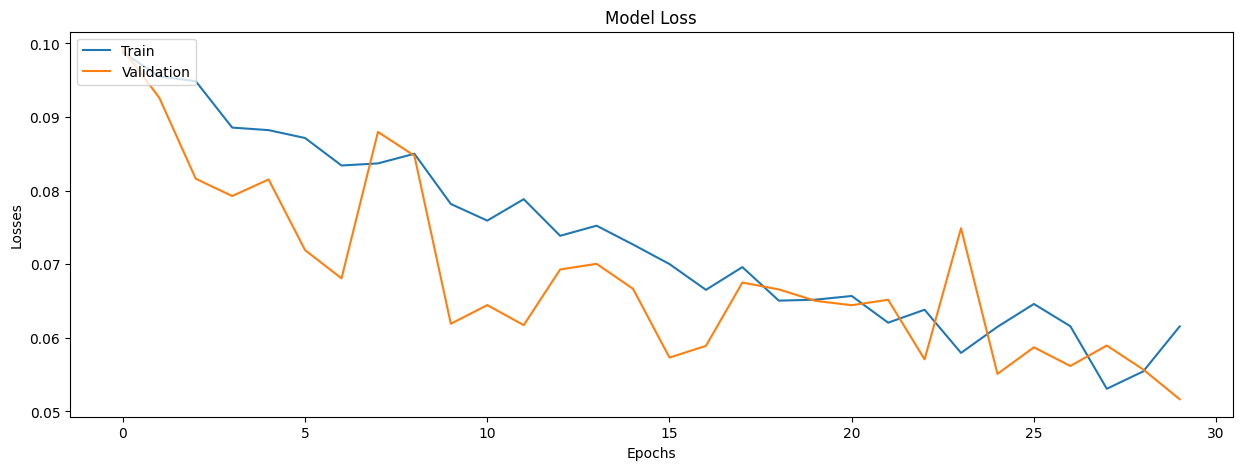

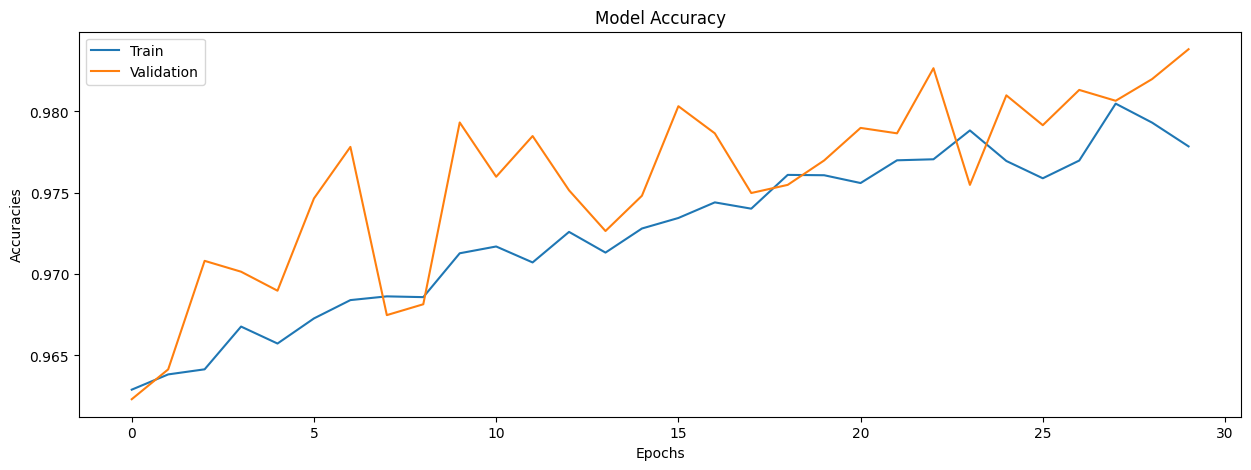

fold 2 ...
Epoch 1/30
750/750 [==============================] - 7s 7ms/step - loss: 0.0796 - accuracy: 0.9727 - val_loss: 0.0451 - val_accuracy: 0.9828
Epoch 2/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0704 - accuracy: 0.9751 - val_loss: 0.0472 - val_accuracy: 0.9813
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0643 - accuracy: 0.9775 - val_loss: 0.0403 - val_accuracy: 0.9853
Epoch 4/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0698 - accuracy: 0.9745 - val_loss: 0.0450 - val_accuracy: 0.9840
Epoch 5/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0589 - accuracy: 0.9784 - val_loss: 0.0539 - val_accuracy: 0.9803
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0584 - accuracy: 0.9787 - val_loss: 0.0492 - val_accuracy: 0.9838
Epoch 7/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0589 - accuracy: 0.9786 - val_loss: 0.0715 - val_accuracy: 0.

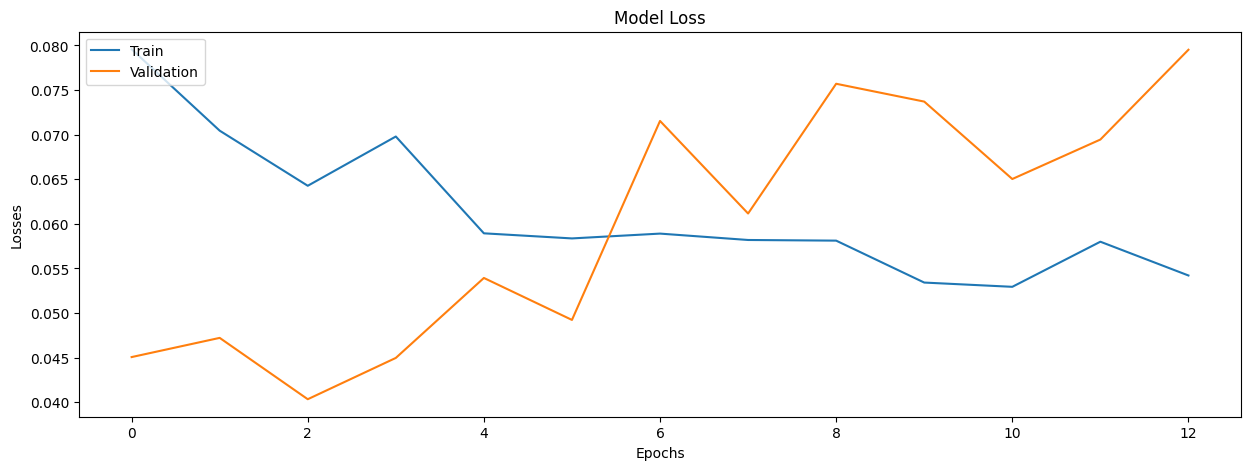

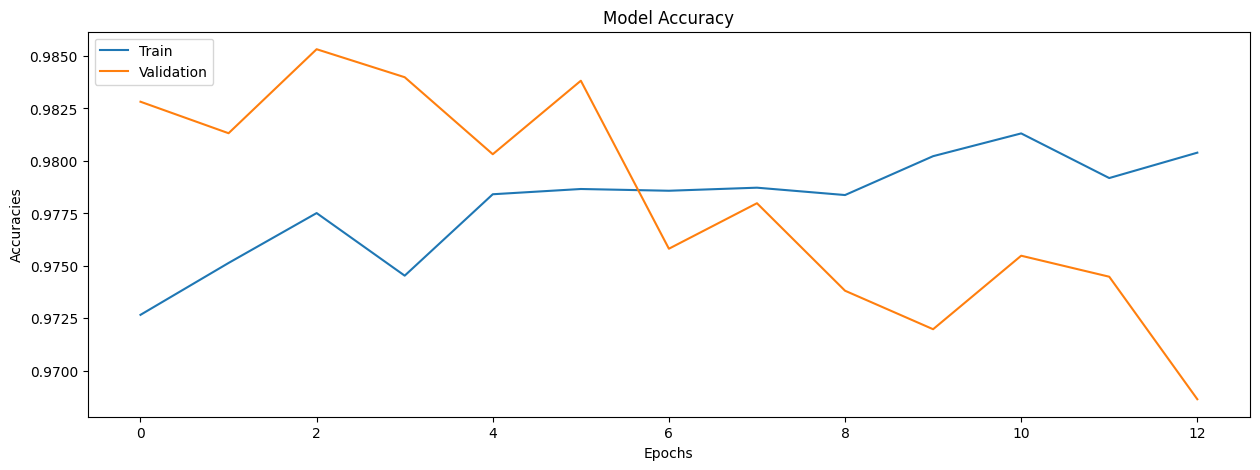

fold 3 ...
Epoch 1/30
750/750 [==============================] - 8s 8ms/step - loss: 0.0583 - accuracy: 0.9786 - val_loss: 0.0416 - val_accuracy: 0.9832
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0610 - accuracy: 0.9792 - val_loss: 0.0341 - val_accuracy: 0.9898
Epoch 3/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0509 - accuracy: 0.9805 - val_loss: 0.0462 - val_accuracy: 0.9825
Epoch 4/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0506 - accuracy: 0.9812 - val_loss: 0.0434 - val_accuracy: 0.9830
Epoch 5/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0515 - accuracy: 0.9806 - val_loss: 0.0479 - val_accuracy: 0.9823
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0526 - accuracy: 0.9812 - val_loss: 0.0573 - val_accuracy: 0.9788
Epoch 7/30
750/750 [==============================] - 6s 7ms/step - loss: 0.0481 - accuracy: 0.9825 - val_loss: 0.0494 - val_accuracy: 0.

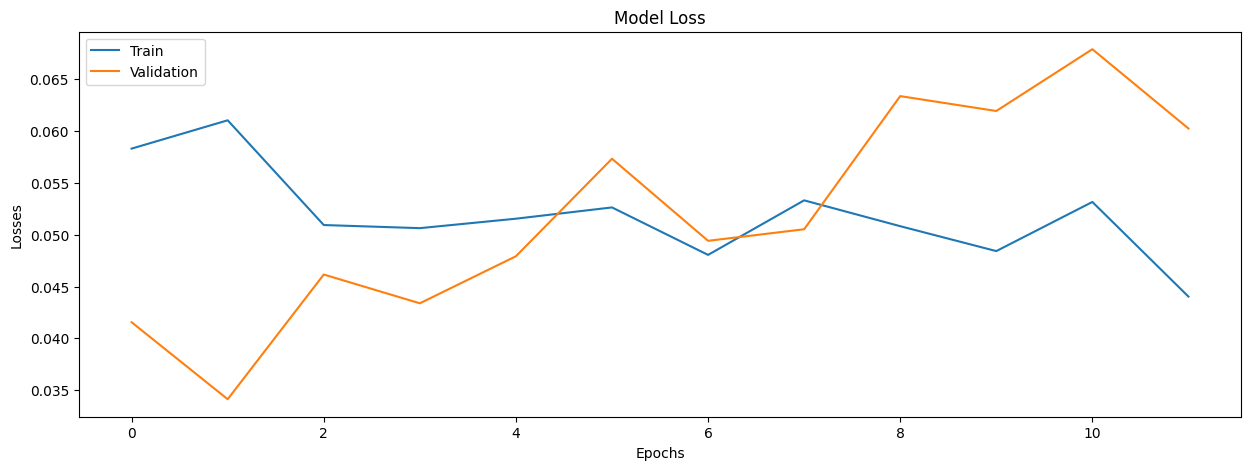

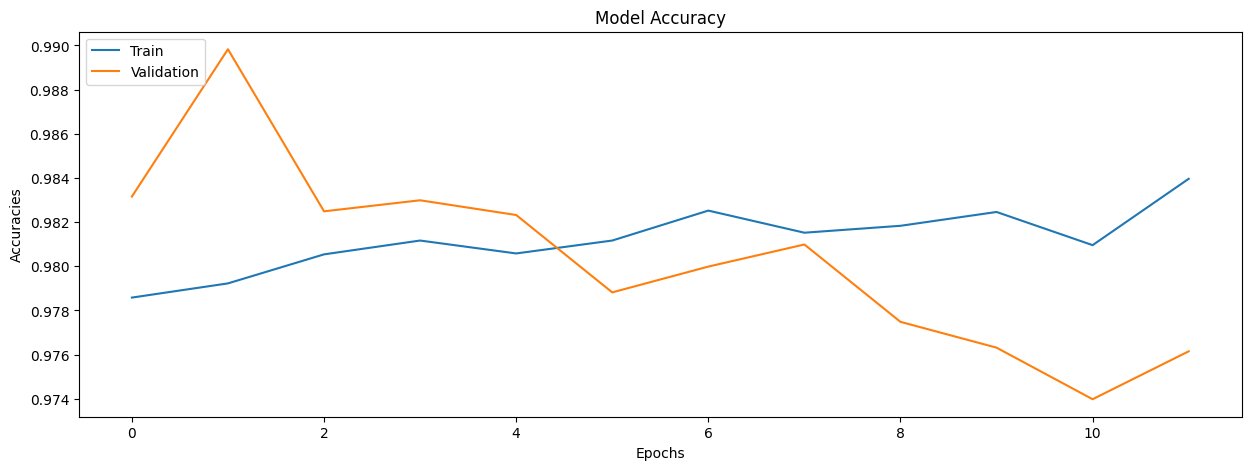

fold 4 ...
Epoch 1/30
750/750 [==============================] - 8s 8ms/step - loss: 0.0512 - accuracy: 0.9817 - val_loss: 0.0339 - val_accuracy: 0.9885
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0513 - accuracy: 0.9815 - val_loss: 0.0460 - val_accuracy: 0.9840
Epoch 3/30
750/750 [==============================] - 6s 7ms/step - loss: 0.0461 - accuracy: 0.9830 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 4/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0469 - accuracy: 0.9832 - val_loss: 0.0380 - val_accuracy: 0.9847
Epoch 5/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0473 - accuracy: 0.9832 - val_loss: 0.0401 - val_accuracy: 0.9855
Epoch 6/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0466 - accuracy: 0.9838 - val_loss: 0.0394 - val_accuracy: 0.9852
Epoch 7/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0478 - accuracy: 0.9834 - val_loss: 0.0449 - val_accuracy: 0.

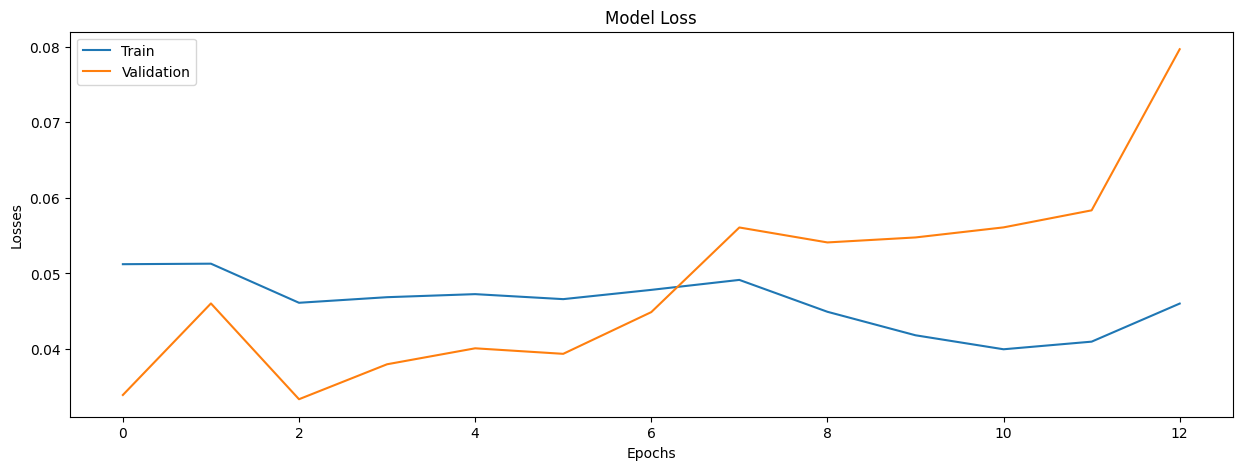

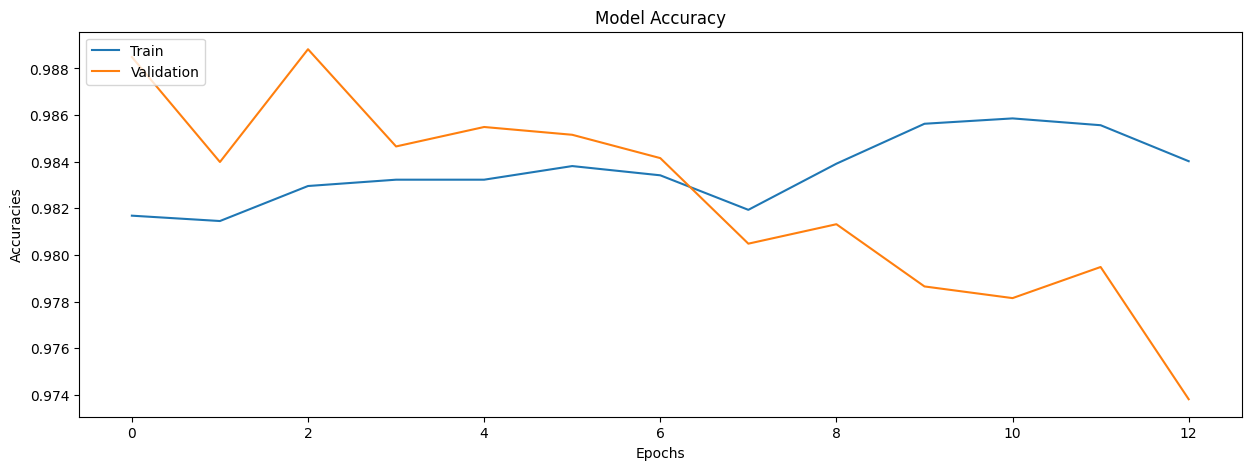

fold 5 ...
Epoch 1/30
750/750 [==============================] - 8s 8ms/step - loss: 0.0492 - accuracy: 0.9829 - val_loss: 0.0214 - val_accuracy: 0.9917
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0431 - accuracy: 0.9849 - val_loss: 0.0276 - val_accuracy: 0.9903
Epoch 3/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0455 - accuracy: 0.9837 - val_loss: 0.0360 - val_accuracy: 0.9868
Epoch 4/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0447 - accuracy: 0.9843 - val_loss: 0.0371 - val_accuracy: 0.9853
Epoch 5/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0436 - accuracy: 0.9844 - val_loss: 0.0278 - val_accuracy: 0.9882
Epoch 6/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.0337 - val_accuracy: 0.9890
Epoch 7/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0460 - accuracy: 0.9841 - val_loss: 0.0313 - val_accuracy: 0.

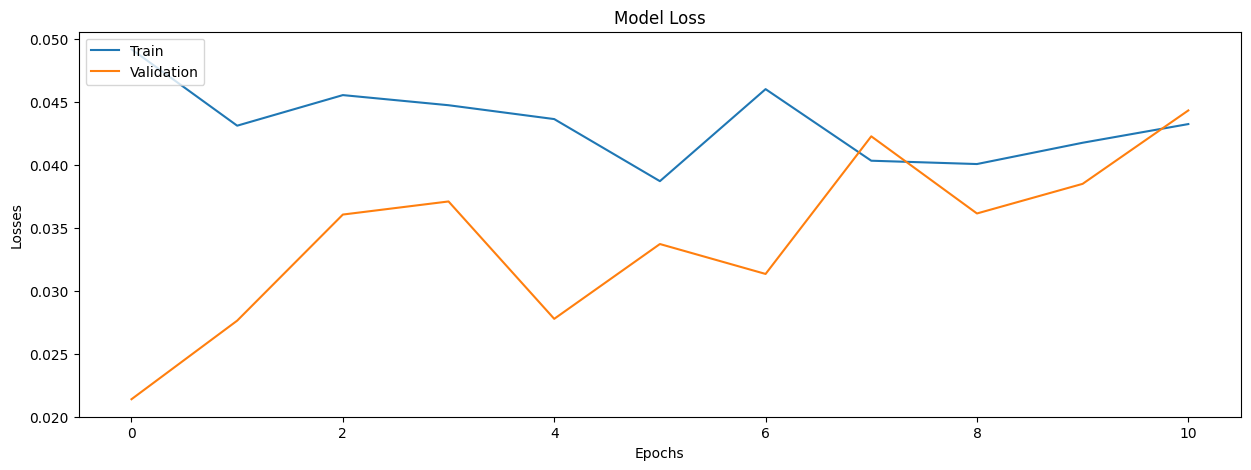

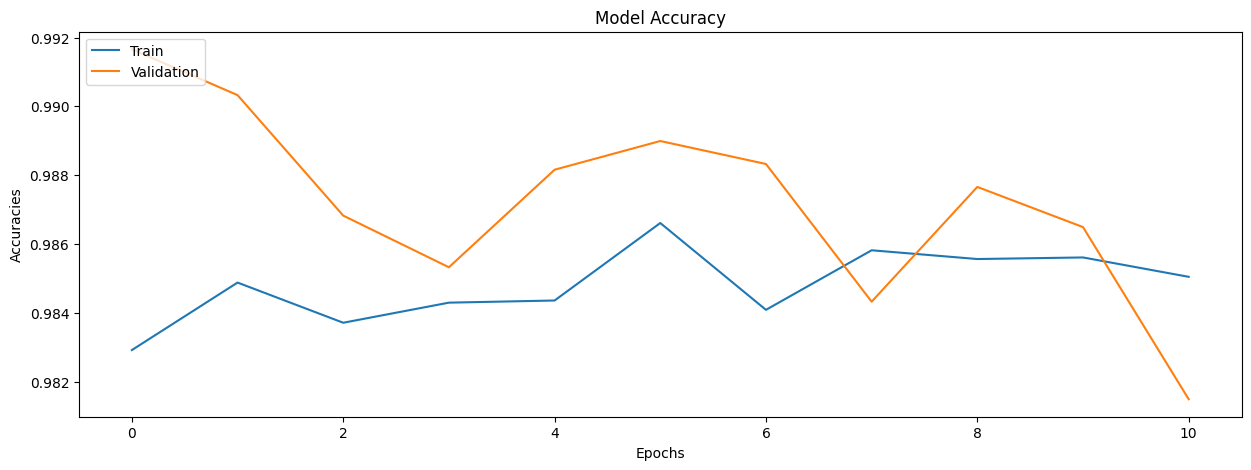

fold 6 ...
Epoch 1/30
750/750 [==============================] - 9s 8ms/step - loss: 0.0442 - accuracy: 0.9845 - val_loss: 0.0263 - val_accuracy: 0.9898
Epoch 2/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0397 - accuracy: 0.9861 - val_loss: 0.0284 - val_accuracy: 0.9902
Epoch 3/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0398 - accuracy: 0.9862 - val_loss: 0.0307 - val_accuracy: 0.9890
Epoch 4/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0414 - accuracy: 0.9849 - val_loss: 0.0401 - val_accuracy: 0.9848
Epoch 5/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0429 - accuracy: 0.9851 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0333 - accuracy: 0.9882 - val_loss: 0.0300 - val_accuracy: 0.9893
Epoch 7/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0433 - accuracy: 0.9841 - val_loss: 0.0452 - val_accuracy: 0.

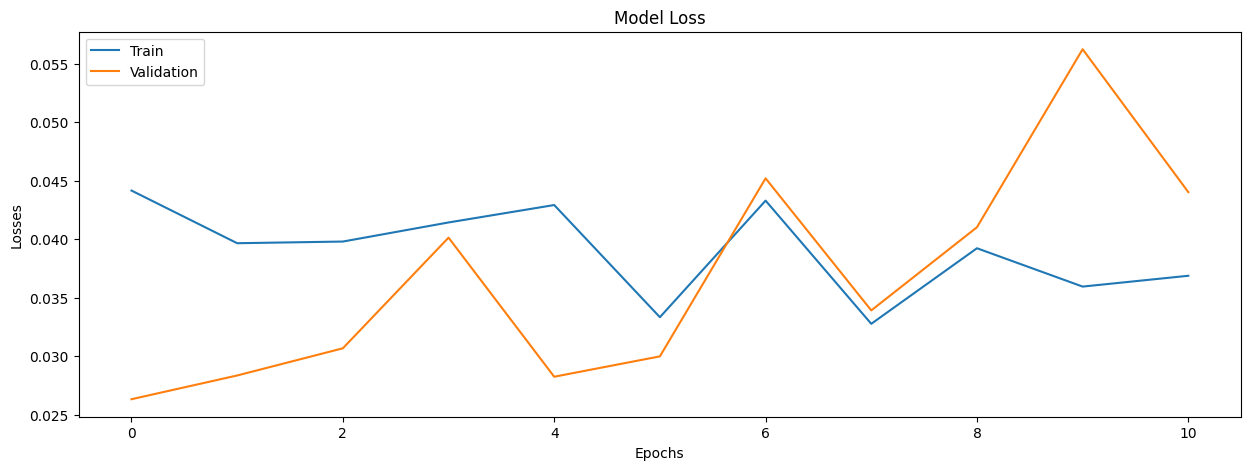

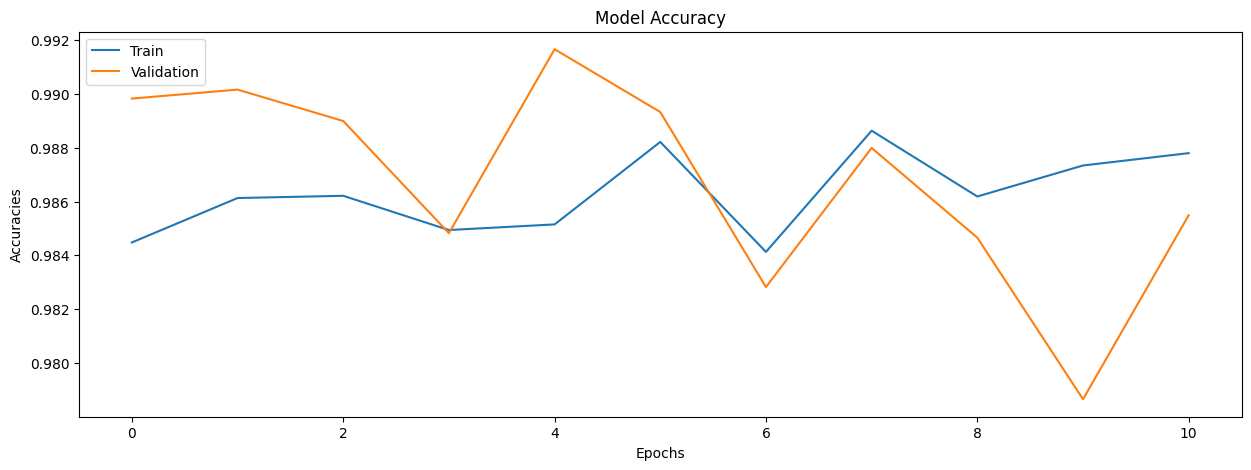

fold 7 ...
Epoch 1/30
750/750 [==============================] - 8s 8ms/step - loss: 0.0381 - accuracy: 0.9860 - val_loss: 0.0151 - val_accuracy: 0.9952
Epoch 2/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0389 - accuracy: 0.9864 - val_loss: 0.0237 - val_accuracy: 0.9908
Epoch 3/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0388 - accuracy: 0.9863 - val_loss: 0.0182 - val_accuracy: 0.9932
Epoch 4/30
750/750 [==============================] - 6s 7ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 0.0234 - val_accuracy: 0.9913
Epoch 5/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 0.0306 - val_accuracy: 0.9892
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0355 - accuracy: 0.9883 - val_loss: 0.0283 - val_accuracy: 0.9897
Epoch 7/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0366 - accuracy: 0.9870 - val_loss: 0.0317 - val_accuracy: 0.

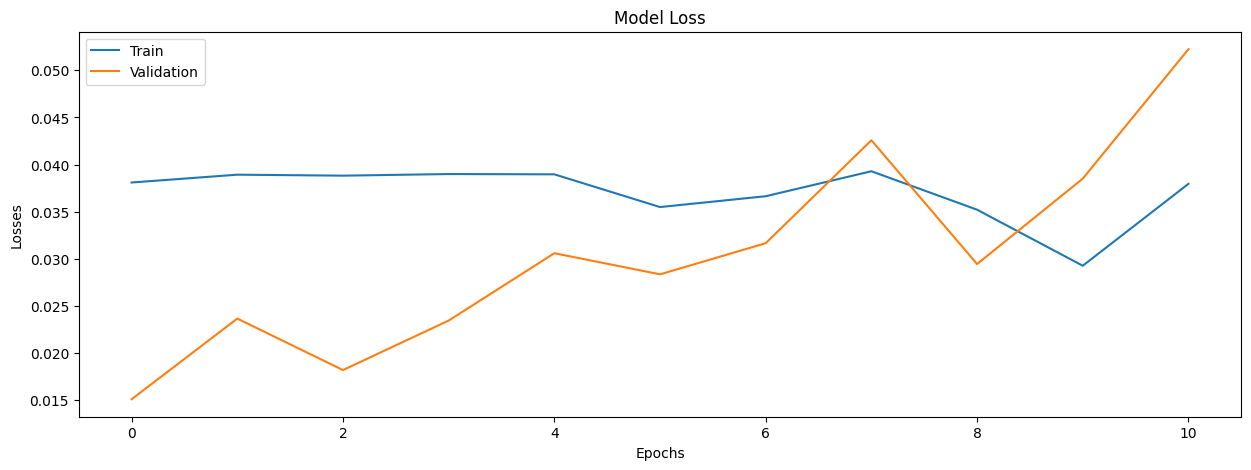

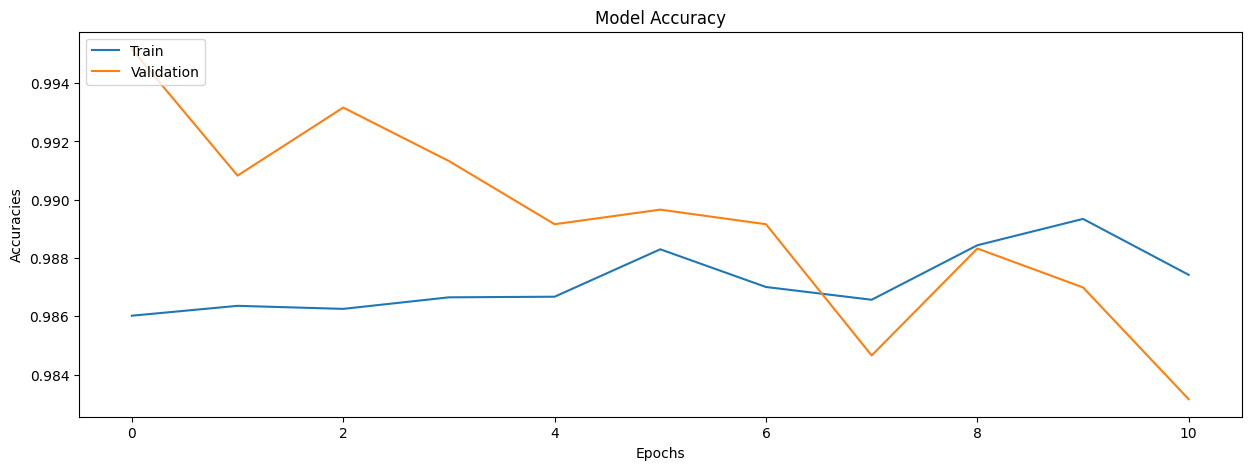

fold 8 ...
Epoch 1/30
750/750 [==============================] - 8s 8ms/step - loss: 0.0416 - accuracy: 0.9861 - val_loss: 0.0228 - val_accuracy: 0.9917
Epoch 2/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0337 - accuracy: 0.9880 - val_loss: 0.0211 - val_accuracy: 0.9918
Epoch 3/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0391 - accuracy: 0.9866 - val_loss: 0.0178 - val_accuracy: 0.9938
Epoch 4/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0342 - accuracy: 0.9886 - val_loss: 0.0219 - val_accuracy: 0.9920
Epoch 5/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0354 - accuracy: 0.9880 - val_loss: 0.0283 - val_accuracy: 0.9890
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0387 - accuracy: 0.9860 - val_loss: 0.0411 - val_accuracy: 0.9863
Epoch 7/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.0243 - val_accuracy: 0.

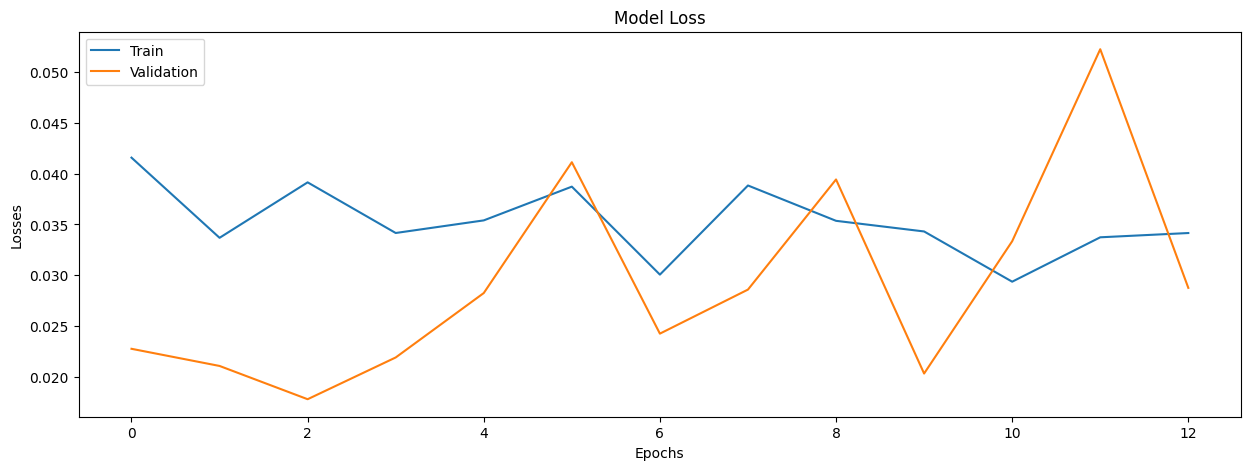

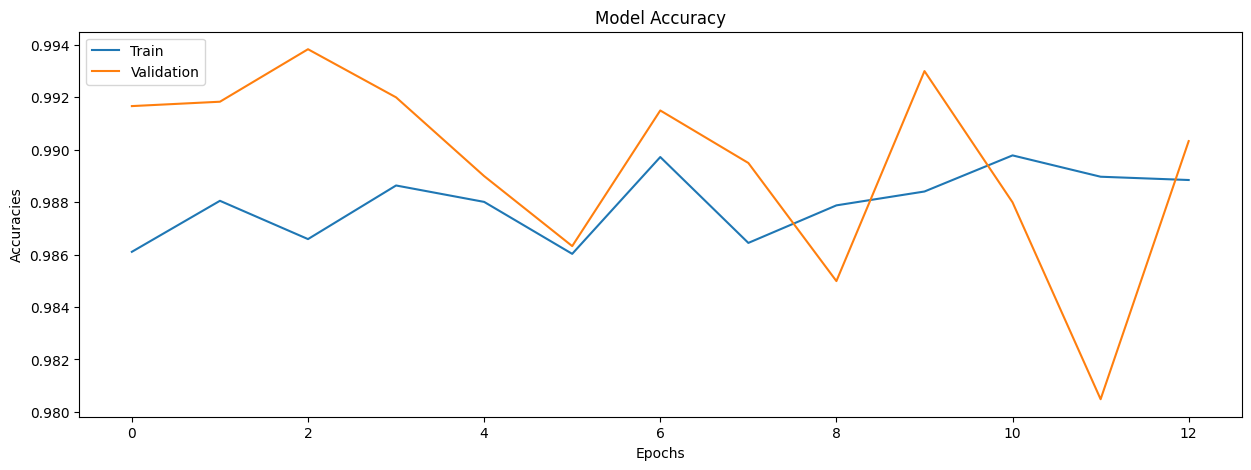

fold 9 ...
Epoch 1/30
750/750 [==============================] - 8s 7ms/step - loss: 0.0350 - accuracy: 0.9879 - val_loss: 0.0196 - val_accuracy: 0.9938
Epoch 2/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0384 - accuracy: 0.9867 - val_loss: 0.0159 - val_accuracy: 0.9938
Epoch 3/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 4/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0366 - accuracy: 0.9876 - val_loss: 0.0193 - val_accuracy: 0.9927
Epoch 5/30
750/750 [==============================] - 6s 9ms/step - loss: 0.0330 - accuracy: 0.9887 - val_loss: 0.0230 - val_accuracy: 0.9925
Epoch 6/30
750/750 [==============================] - 6s 7ms/step - loss: 0.0330 - accuracy: 0.9884 - val_loss: 0.0226 - val_accuracy: 0.9935
Epoch 7/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0346 - accuracy: 0.9882 - val_loss: 0.0561 - val_accuracy: 0.

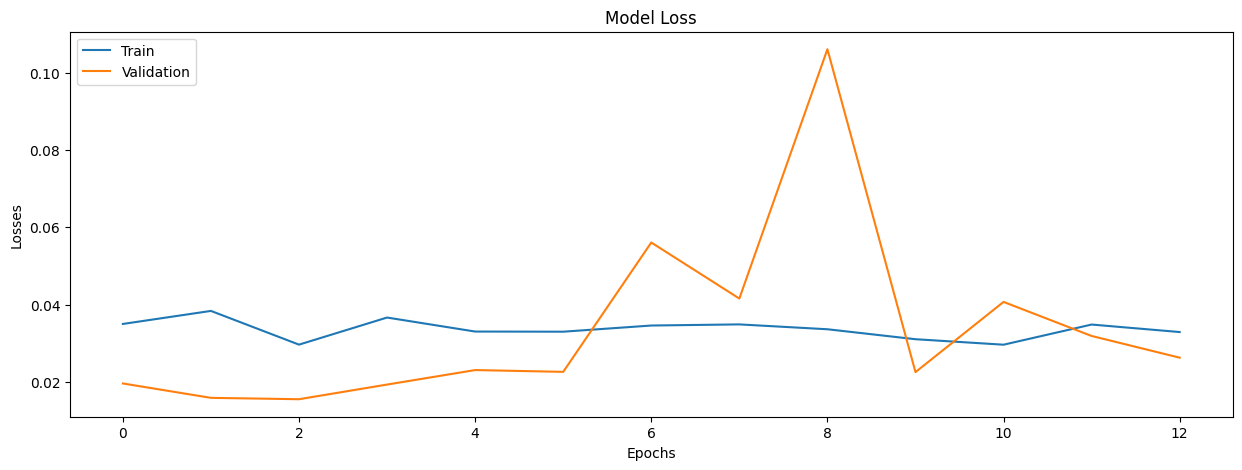

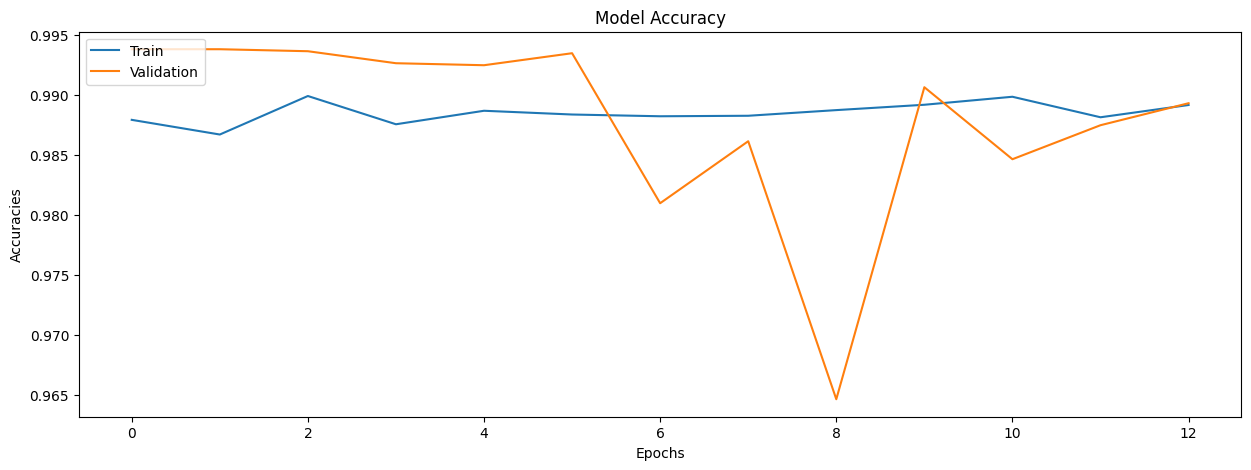

fold 10 ...
Epoch 1/30
750/750 [==============================] - 9s 9ms/step - loss: 0.0343 - accuracy: 0.9885 - val_loss: 0.0123 - val_accuracy: 0.9955
Epoch 2/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0300 - accuracy: 0.9897 - val_loss: 0.0136 - val_accuracy: 0.9948
Epoch 3/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0306 - accuracy: 0.9886 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 4/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0201 - val_accuracy: 0.9928
Epoch 5/30
750/750 [==============================] - 6s 7ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0220 - val_accuracy: 0.9913
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0302 - accuracy: 0.9898 - val_loss: 0.0186 - val_accuracy: 0.9948
Epoch 7/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0235 - val_accuracy: 0

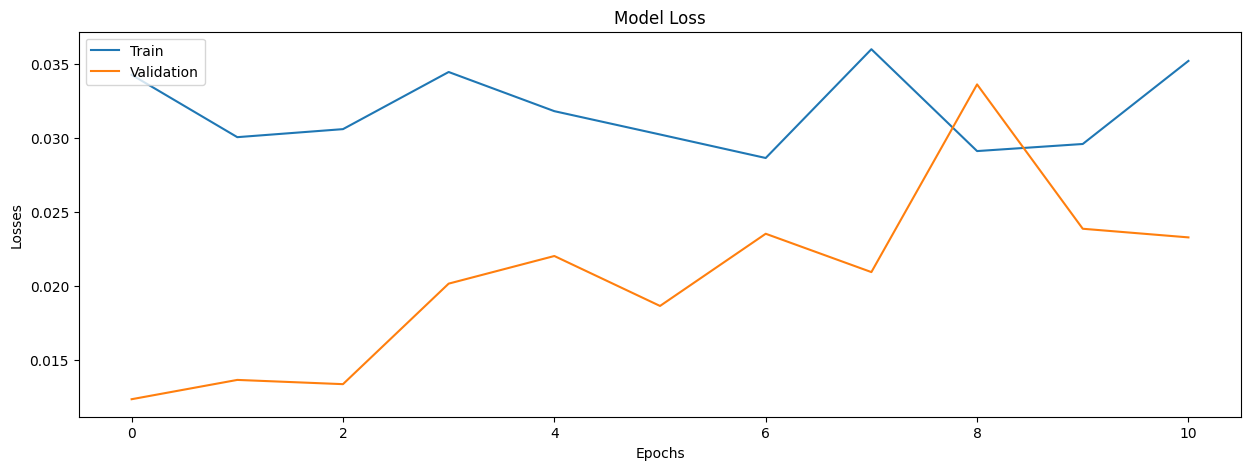

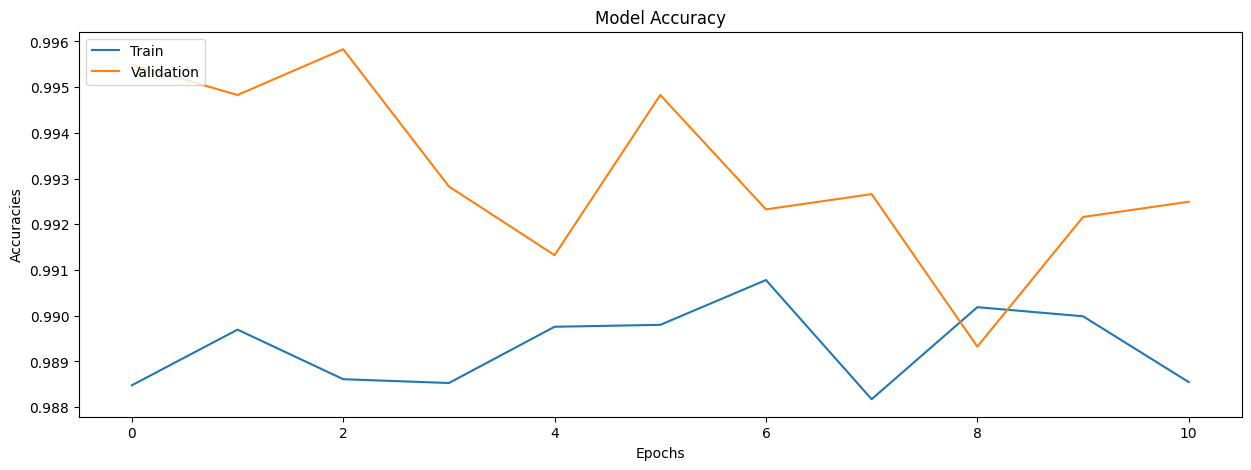

In [56]:
# Merge inputs and targets
inputs = np.concatenate((x_train1, x_val1), axis=0)
targets = np.concatenate((train_labels_one_hot, val_labels_one_hot), axis=0)

# Define the K-fold Cross Validator
n_folds = 10
acc_per_fold = []
loss_per_fold = []
kfold = KFold(n_splits=n_folds, shuffle=True)

stop_early = EarlyStopping(monitor='val_loss', patience=10)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    print(f'fold {fold_no} ...')
    fModel.compile(optimizer=Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])

    # Fit data to model
    history = fModel.fit( inputs[train], targets[train], batch_size=64, 
                          steps_per_epoch = int(np.ceil(len(x_train1)/float(64))),
                          epochs = 30, 
                          validation_data =(inputs[test], targets[test]),
                          shuffle = True, callbacks = [stop_early])
    
    plot_graphs(history, type="loss")
    plot_graphs(history, type="accuracy")

    # Generate generalization metrics
    scores = fModel.evaluate(inputs[test], targets[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

### Observation:
All accuracies and losses across all folds lie in the same range of values and this indicates that our model doesn't suffer from high variance (doesn't overfit).


# Transfer Learning
## Using other CNN models and compare the  results with the full trained LeNet-5.

# Build Model using the pre-trained ResNet152V2 Model

In [57]:
def ResNet_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(32, 32, 1))
    img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = ResNet152V2(weights='imagenet', include_top=False, input_tensor=img_conc)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(1024, activation='relu')(x)
    # # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

In [58]:
resnet_model = ResNet_builder()
resnet_model.summary()

234545216/234545216 [==============================] - 13s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 32, 32, 3)    0           ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['concatenate[0][0]']            
                          

In [59]:
res_history = resnet_model.fit(x_train1, train_labels_one_hot, epochs=20, batch_size=50, validation_data=(x_val1, val_labels_one_hot), callbacks=[EarlyStopping(patience=10)])

Epoch 1/20
960/960 [==============================] - 55s 43ms/step - loss: 1.3680 - accuracy: 0.4571 - val_loss: 1.1051 - val_accuracy: 0.5561
Epoch 2/20
960/960 [==============================] - 35s 36ms/step - loss: 1.0861 - accuracy: 0.5801 - val_loss: 0.9727 - val_accuracy: 0.6240
Epoch 3/20
960/960 [==============================] - 35s 36ms/step - loss: 1.0424 - accuracy: 0.6005 - val_loss: 0.9192 - val_accuracy: 0.6422
Epoch 4/20
960/960 [==============================] - 34s 36ms/step - loss: 0.9979 - accuracy: 0.6167 - val_loss: 0.9465 - val_accuracy: 0.6245
Epoch 5/20
960/960 [==============================] - 39s 41ms/step - loss: 0.9908 - accuracy: 0.6222 - val_loss: 0.9049 - val_accuracy: 0.6340
Epoch 6/20
960/960 [==============================] - 39s 41ms/step - loss: 0.9761 - accuracy: 0.6304 - val_loss: 0.8431 - val_accuracy: 0.6706
Epoch 7/20
960/960 [==============================] - 36s 37ms/step - loss: 0.9590 - accuracy: 0.6356 - val_loss: 0.8329 - val_accuracy:

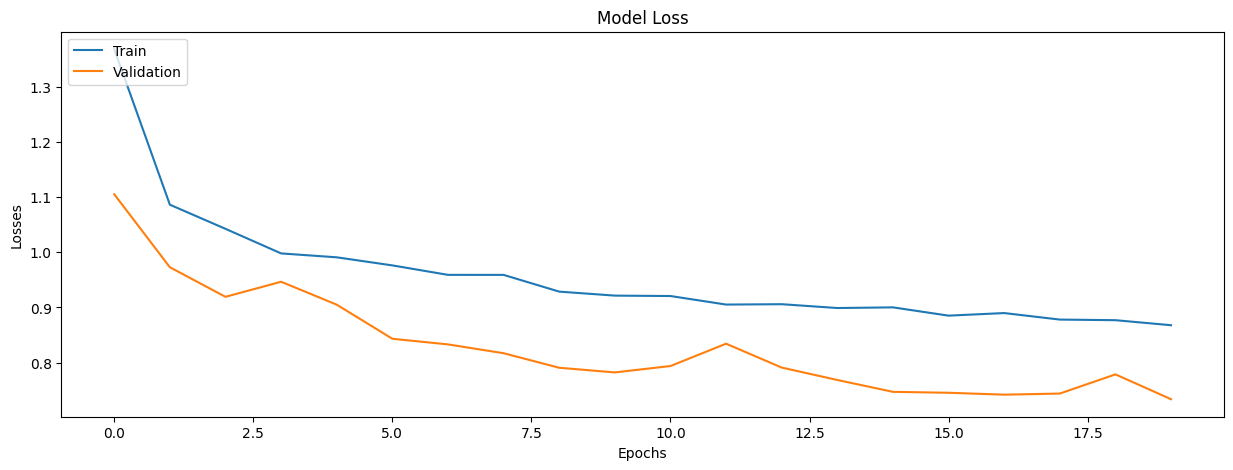

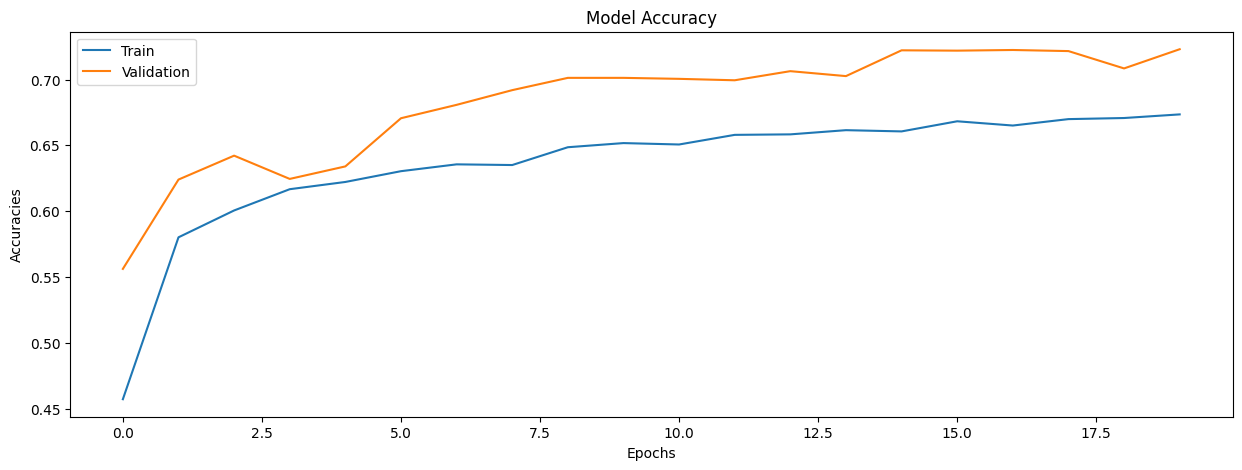

In [60]:
plot_graphs(res_history, type="loss")
plot_graphs(res_history, type="accuracy")

# Build Model using pre-trained EfficientNetB1 Model

In [61]:
def EfficientNetB1_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(32, 32, 1))
    img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = EfficientNetB1(weights='imagenet', include_top=False, input_tensor=img_conc)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    # x = Dense(1024, activation='relu')(x)
    # # adding a dropout layer
    # x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

In [62]:
EfficientNetB1_model = EfficientNetB1_builder()
EfficientNetB1_model.summary()

27018416/27018416 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 32, 32, 3)    0           ['input_2[0][0]',                
                                                                  'input_2[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['concatenate_1[0][0]']          
                           

In [63]:
eff_history = EfficientNetB1_model.fit(x_train1, train_labels_one_hot, epochs=20, batch_size=50, validation_data=(x_val1, val_labels_one_hot), callbacks=[EarlyStopping(patience=10)])

Epoch 1/20
960/960 [==============================] - 32s 22ms/step - loss: 2.3079 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 2/20
960/960 [==============================] - 16s 17ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
960/960 [==============================] - 16s 16ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/20
960/960 [==============================] - 16s 16ms/step - loss: 2.3028 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
960/960 [==============================] - 16s 16ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
960/960 [==============================] - 16s 16ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/20
960/960 [==============================] - 16s 17ms/step - loss: 2.3028 - accuracy: 0.0956 - val_loss: 2.3026 - val_accuracy:

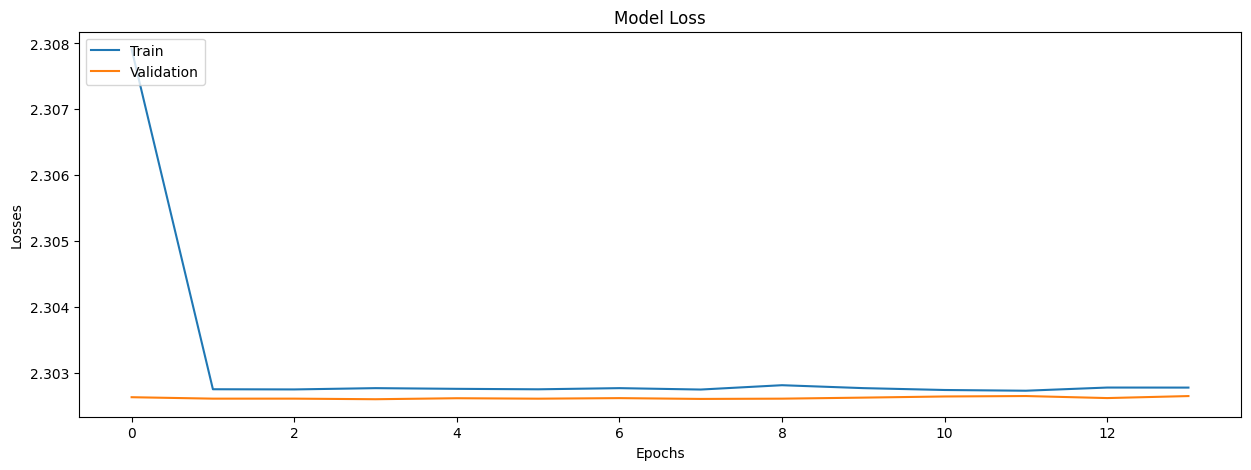

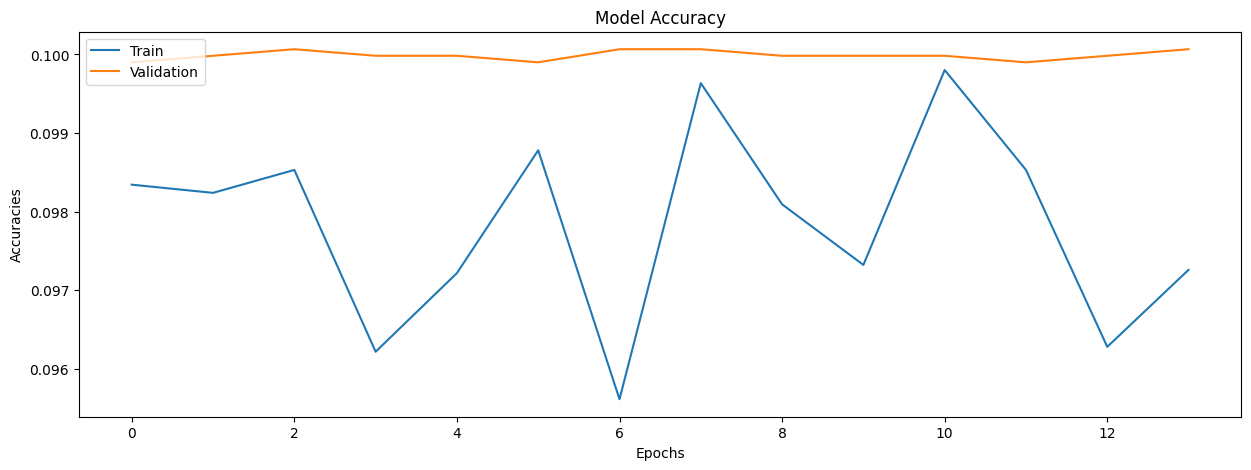

In [64]:
plot_graphs(eff_history, type="loss")
plot_graphs(eff_history, type="accuracy")

# Build Model using the pre-trained VGG16_builder model 

In [65]:
def VGG16_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(32, 32, 1))
    img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = VGG16(weights='imagenet', include_top=False, input_tensor=img_conc)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(1024, activation='relu')(x)
    # # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

In [66]:
VGG16_model = VGG16_builder()
VGG16_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 32, 32, 3)    0           ['input_3[0][0]',                
                                                                  'input_3[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 32, 32, 64)   1792        ['concatenate_2[0][0]']          
                           

In [67]:
vgg_history = VGG16_model.fit(x_train1, train_labels_one_hot, epochs=20, batch_size=50, validation_data=(x_val1, val_labels_one_hot), callbacks=[EarlyStopping(patience=10)])

Epoch 1/20
960/960 [==============================] - 20s 18ms/step - loss: 2.3071 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 2/20
960/960 [==============================] - 14s 14ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/20
960/960 [==============================] - 14s 15ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 4/20
960/960 [==============================] - 14s 14ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/20
960/960 [==============================] - 14s 15ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 6/20
960/960 [==============================] - 14s 14ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/20
960/960 [==============================] - 14s 14ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy:

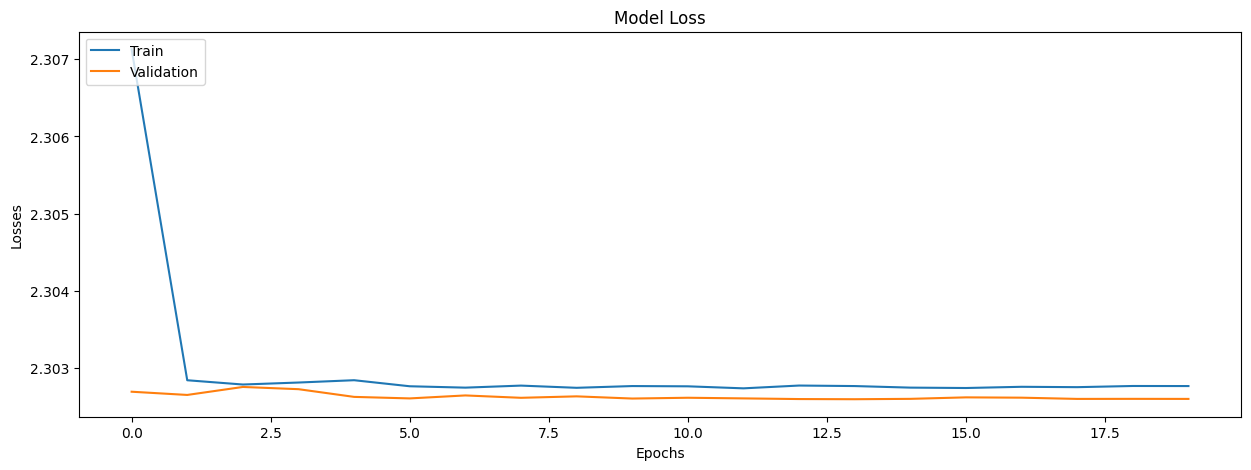

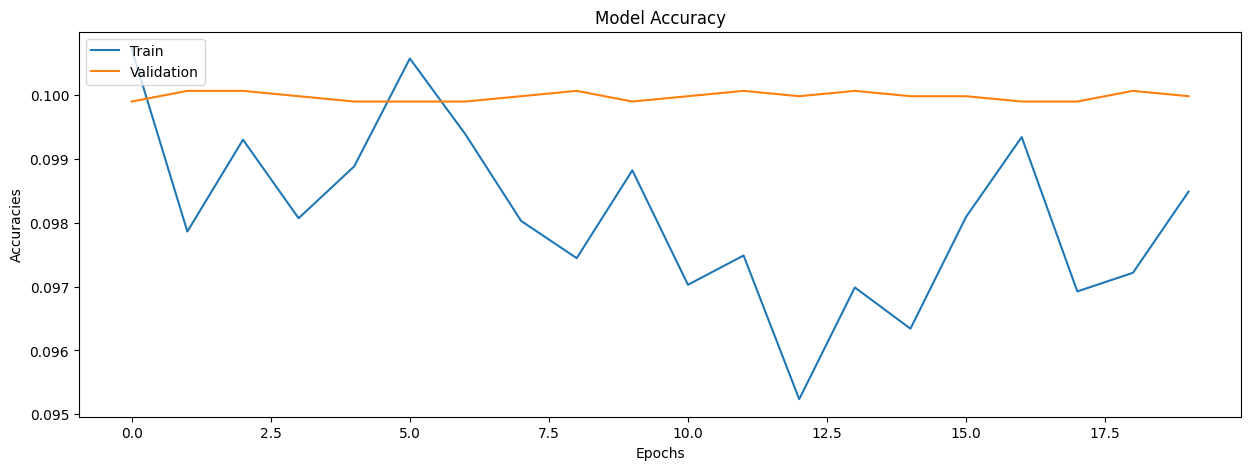

In [68]:
plot_graphs(vgg_history, type="loss")
plot_graphs(vgg_history, type="accuracy")

## Conclusion:
As we can see, the accuracy dropped when we used transfer learning.
Transfer learning may fail if there is a domain mismatch between the dataset for pretext tasks and the dataset for the downstream task. Although the pre-trained models may converge, they will remain locked at a local minimum. As a result, the performance will be no better than if you started from scratch.